Bibliotecas utilizadas neste projeto podem ser instaladas como a seguir:

pip install duckdb

pip install pandas

pip install dbt-duckdb

pip install pandera

pip install matplotlib

In [2]:
# Bibliotecas utilizadas para o projeto -- tratamento de dados consulta sql no banco de dados
import duckdb
import pandas as pd
import pandera as pa
from pandera import Column, DataFrameSchema, Check

# # Ler o arquivo CSV em um DataFrame
# df_calendar = pd.read_csv('calendar.csv')
# df_reviews = pd.read_csv('reviews.csv')
# df_listings = pd.read_csv('listings.csv')

# # Salvar o DataFrame em formato Parquet
# calendario = df_calendar.to_parquet('calendar.parquet', engine='pyarrow')
# reviews = df_reviews.to_parquet('reviews.parquet', engine='pyarrow')
# listings = df_listings.to_parquet('listings.parquet', engine='pyarrow')

In [3]:
# Ler e salvar os arquivos trabalhados com duckdb:
calendario = duckdb.sql("SELECT * FROM read_csv('calendar.csv')").to_df()
reviews = duckdb.sql("SELECT * FROM read_csv('reviews.csv')").to_df()
listings = duckdb.sql("SELECT * FROM read_csv('listings.csv')").to_df()

## Tratando a tabela calendario

In [4]:
# verificar colunas do dataframe
calendario.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,297908,2024-06-27,False,$250.00,None,2.0,1125.0
1,17878,2024-06-28,False,$350.00,None,5.0,28.0
2,17878,2024-06-29,False,$350.00,None,5.0,28.0
3,17878,2024-06-30,False,$350.00,None,5.0,28.0
4,17878,2024-07-01,False,$350.00,None,5.0,28.0


In [5]:
# extrair valores minimos
calendario.min()

listing_id                      17878
date              2024-06-27 00:00:00
available                       False
price                           $0.00
adjusted_price                   None
minimum_nights                    1.0
maximum_nights                    1.0
dtype: object

In [6]:
# extrair valores máximos
calendario.max()

listing_id        1187208562438757497
date              2025-06-27 00:00:00
available                        True
price                         $999.00
adjusted_price                   None
minimum_nights                 1125.0
maximum_nights                 1125.0
dtype: object

In [7]:
# contagem de valores das colunas
calendario.count()

listing_id        12652371
date              12652371
available         12652371
price             12652371
adjusted_price           0
minimum_nights    12652359
maximum_nights    12652359
dtype: int64

In [8]:
# verificação de tipagem dos dados
calendario.dtypes

listing_id                 int64
date              datetime64[us]
available                   bool
price                     object
adjusted_price            object
minimum_nights           float64
maximum_nights           float64
dtype: object

### Tratando a coluna 'price'
#### Retirar o $ e converter a coluna para float:

Foi identificado que a coluna 'price' está no formato object e iremos tratar para deixar no formato float

In [9]:
# Retirando cifrão e virgulas para converter preços em float 
calendario['price'] = calendario['price'].str.replace("$", "", regex=False)
calendario['price'] = calendario['price'].str.replace(",", "", regex=False).astype(float)
calendario.describe()

,listing_id,date,price,minimum_nights,maximum_nights
count,1.265237e+07,12652371,1.265237e+07,1.265236e+07,1.265236e+07
mean,5.590520e+17,2024-12-26 13:31:57.142678,6.783943e+02,3.720641e+00,5.262498e+02
min,1.787800e+04,2024-06-27 00:00:00,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.615109e+07,2024-09-26 00:00:00,1.990000e+02,1.000000e+00,9.000000e+01
50%,7.270978e+17,2024-12-27 00:00:00,3.000000e+02,2.000000e+00,3.650000e+02
75%,1.027119e+18,2025-03-28 00:00:00,5.750000e+02,3.000000e+00,1.125000e+03
max,1.187209e+18,2025-06-27 00:00:00,5.000000e+05,1.125000e+03,1.125000e+03
std,4.785059e+17,NaN,4.402481e+03,1.310962e+01,4.534074e+02


In [10]:
calendario

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,297908,2024-06-27,False,250.0,None,2.0,1125.0
1,17878,2024-06-28,False,350.0,None,5.0,28.0
2,17878,2024-06-29,False,350.0,None,5.0,28.0
3,17878,2024-06-30,False,350.0,None,5.0,28.0
4,17878,2024-07-01,False,350.0,None,5.0,28.0
...,...,...,...,...,...,...,...
12652366,1187208562438757497,2025-06-22,False,250.0,None,1.0,365.0
12652367,1187208562438757497,2025-06-23,False,250.0,None,1.0,365.0
12652368,1187208562438757497,2025-06-24,False,250.0,None,1.0,365.0
12652369,1187208562438757497,2025-06-25,False,250.0,None,1.0,365.0


### Tratando as colunas 'minimum_nights' e 'maximum_nights'
#### Transformar os dados para int:


In [11]:
calendario['minimum_nights'] = calendario['minimum_nights'].fillna(0).astype(int)
calendario['minimum_nights'].dtype

dtype('int64')

In [12]:
calendario['maximum_nights'].max()

np.float64(1125.0)

In [13]:
# Substituindo nulos por 0 para conversão em int
calendario['maximum_nights'] = calendario['maximum_nights'].fillna(1825).astype(int)
calendario['maximum_nights'].dtype

dtype('int64')

In [14]:
calendario['maximum_nights'].max()

np.int64(1825)

In [15]:
calendario

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,297908,2024-06-27,False,250.0,None,2,1125
1,17878,2024-06-28,False,350.0,None,5,28
2,17878,2024-06-29,False,350.0,None,5,28
3,17878,2024-06-30,False,350.0,None,5,28
4,17878,2024-07-01,False,350.0,None,5,28
...,...,...,...,...,...,...,...
12652366,1187208562438757497,2025-06-22,False,250.0,None,1,365
12652367,1187208562438757497,2025-06-23,False,250.0,None,1,365
12652368,1187208562438757497,2025-06-24,False,250.0,None,1,365
12652369,1187208562438757497,2025-06-25,False,250.0,None,1,365


## Tratando a tabela reviews

In [16]:
# verificar colunas do dataframe
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...
3,17878,137528,2010-11-12,230449,Orene,In general very good and reasonable price.\r<b...
4,17878,147594,2010-12-01,219338,David,The apt was nice and in a great location only ...


In [17]:
reviews.count()

listing_id       773134
id               773134
date             773134
reviewer_id      773134
reviewer_name    773134
comments         773134
dtype: int64

In [18]:
reviews.dtypes

listing_id                int64
id                        int64
date             datetime64[us]
reviewer_id               int64
reviewer_name            object
comments                 object
dtype: object

In [19]:
reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [20]:
reviews.describe()

,listing_id,id,date,reviewer_id
count,7.731340e+05,7.731340e+05,773134,7.731340e+05
mean,2.162593e+17,6.256662e+17,2021-12-26 21:34:06.838969,2.099771e+08
min,1.787800e+04,5.063600e+04,2010-06-07 00:00:00,5.000000e+00
25%,1.194864e+07,7.095834e+08,2020-11-17 00:00:00,5.944448e+07
50%,3.651046e+07,7.651924e+17,2022-11-21 00:00:00,1.683638e+08
75%,5.729047e+17,1.010881e+18,2023-10-26 00:00:00,3.490236e+08
max,1.183434e+18,1.188559e+18,2024-06-27 00:00:00,5.853022e+08
std,3.671458e+17,4.357036e+17,NaN,1.653966e+08


## Tratando a tabela listings

In [21]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20240627045056,2024-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates applies for Ne...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.77,4.67,None,False,1,1,0,0,1.88
1,25026,https://www.airbnb.com/rooms/25026,20240627045056,2024-06-28,city scrape,Beautiful Modern Decorated Studio in Copa,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/7c08fa4f-1d7b...,102840,...,4.92,4.84,4.62,None,False,1,1,0,0,1.70
2,220377,https://www.airbnb.com/rooms/220377,20240627045056,2024-06-27,city scrape,Suíte Casal (banheiro privativo),The apartment is cozy and well located. The r...,Tijuca is a residential neigbohood in Rio clos...,https://a0.muscache.com/pictures/992d8e44-0ef1...,1142424,...,4.80,4.80,5.00,None,False,3,0,3,0,0.03
3,35764,https://www.airbnb.com/rooms/35764,20240627045056,2024-06-28,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,...,4.95,4.94,4.89,None,False,1,1,0,0,2.85
4,223073,https://www.airbnb.com/rooms/223073,20240627045056,2024-06-28,city scrape,Modern Loft 1 • Ipanema Posto 9 • 500 mb,READ THE FREQUENTLY ASKED QUESTIONS BELOW AND ...,DON'T KNOW IPANEMA? HERE SOME INFORMATION FOR ...,https://a0.muscache.com/pictures/e56d7053-8f27...,503995,...,4.98,4.97,4.73,None,True,7,7,0,0,3.04


In [22]:
# Para verificar o nome de todas as colunas do df de listings é necessário usar .columns
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [23]:
# verificar duplicados
print(f'{listings.duplicated().sum()}')

0


In [24]:
listings.count()

id                                              34664
listing_url                                     34664
scrape_id                                       34664
last_scraped                                    34664
source                                          34664
                                                ...  
calculated_host_listings_count                  34664
calculated_host_listings_count_entire_homes     34664
calculated_host_listings_count_private_rooms    34664
calculated_host_listings_count_shared_rooms     34664
reviews_per_month                               26218
Length: 75, dtype: int64

In [25]:
listings['license'].notna()

0        False
1        False
2        False
3        False
4        False
         ...  
34659    False
34660    False
34661    False
34662    False
34663    False
Name: license, Length: 34664, dtype: bool

In [26]:
# Cria um csv para visualizzaros valores nulos de todas as colunas
pd.set_option('display.max_rows', None)
listings.isnull().sum().to_csv('nulos_listing.csv', header= True)

In [27]:
nulos_listing = pd.read_csv('nulos_listing.csv')

In [28]:
# renome das colunas
nulos_listing = nulos_listing.rename(columns={'Unnamed: 0' : 'Colunas', '0' : 'Qtde nulos'})
nulos_listing

,Colunas,Qtde nulos
0,id,0
1,listing_url,0
2,scrape_id,0
3,last_scraped,0
4,source,0
5,name,0
6,description,1163
7,neighborhood_overview,17648
8,picture_url,0
9,host_id,0


In [29]:
listings.dtypes

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[us]
source                                                  object
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[us]
host_location                                           object
host_about                                              object
host_response_time                                     

### Tratando a coluna 'price'
#### Retirar o $ e converter a coluna para float:

Foi identificado que a coluna 'price' está no formato object e iremos tratar para deixar no formato float

In [30]:
listings['price'] = listings['price'].str.replace('$', '', regex=False)
listings['price'] = listings['price'].str.replace(',', '', regex=False).astype(float)
listings['price'].describe()

count     33692.000000
mean        731.188235
std        5667.250477
min           0.000000
25%         199.000000
50%         307.000000
75%         572.000000
max      633125.000000
Name: price, dtype: float64

In [31]:
listings.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20240627045056,2024-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates applies for Ne...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.77,4.67,None,False,1,1,0,0,1.88


In [32]:
### Tratando a coluna 'bathrooms'
#### Retirar NAN e converter para int:
listings['bathrooms'] = listings['bathrooms'].fillna(0).astype(int)
listings['bathrooms'].dtype

dtype('int64')

In [33]:
### Tratando a coluna 'bedrooms'
#### Retirar NAN e converter para int:
listings['bedrooms'] = listings['bedrooms'].fillna(0).astype(int)
listings['bedrooms'].dtype

dtype('int64')

In [34]:
# Tratando a coluna 'beds'
# Retirar NAN e converter para int:
listings['beds'] = listings['beds'].fillna(0).astype(int)
listings['beds'].dtype

dtype('int64')

In [35]:
# Tratando a coluna 'minimum_nights':
listings['minimum_nights'] = listings['minimum_nights'].fillna(0).astype(int)
listings['minimum_nights'].dtype

dtype('int64')

In [36]:
# Tratando a coluna 'maximum_nights':
listings['maximum_nights'] = listings['maximum_nights'].fillna(1825).astype(int)
listings['maximum_nights'].dtype

dtype('int64')

### Tratando a coluna 'first_review'

In [37]:
listings['first_review'].isnull().sum()


np.int64(8446)

In [38]:
listings['first_review'].describe()

count                         26218
mean     2021-08-23 02:24:50.090777
min             2010-06-07 00:00:00
25%             2020-01-03 00:00:00
50%             2022-10-14 00:00:00
75%             2023-11-08 00:00:00
max             2024-06-27 00:00:00
Name: first_review, dtype: object

In [39]:
listings['first_review'] = listings['first_review'].fillna(pd.Timestamp('2010-01-01'))

In [40]:
listings['first_review'].isnull().sum()

np.int64(0)

In [41]:
listings['first_review'].describe()

count                         34664
mean     2018-10-22 01:29:16.381260
min             2010-01-01 00:00:00
25%             2013-02-12 18:00:00
50%             2021-10-18 00:00:00
75%             2023-07-25 00:00:00
max             2024-06-27 00:00:00
Name: first_review, dtype: object

### Tratando a coluna 'last_review'

In [42]:
listings['last_review'].isnull().sum()

np.int64(8446)

In [43]:
listings['last_review'].describe()

count                         26218
mean     2023-12-07 11:22:42.392249
min             2012-02-21 00:00:00
25%             2024-01-21 00:00:00
50%             2024-05-05 00:00:00
75%             2024-06-04 00:00:00
max             2024-06-27 00:00:00
Name: last_review, dtype: object

In [44]:
listings['last_review'] = listings['last_review'].fillna(pd.Timestamp('2012-01-01'))
listings['last_review'].isnull().sum()

np.int64(0)

In [45]:
listings['last_review'].describe()

count                         34664
mean     2021-01-09 12:24:50.514655
min             2012-01-01 00:00:00
25%             2016-09-12 00:00:00
50%             2024-02-15 00:00:00
75%             2024-06-02 00:00:00
max             2024-06-27 00:00:00
Name: last_review, dtype: object

### Tratando a coluna 'review_scores_rating'

In [46]:
listings['review_scores_rating'].describe()

count    26218.000000
mean         4.801964
std          0.362256
min          0.000000
25%          4.750000
50%          4.920000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

In [47]:
# Tratando a coluna 'maximum_nights':
listings['review_scores_rating'] = listings['review_scores_rating'].fillna(0)
listings['review_scores_rating'].isnull().sum()

np.int64(0)

### Tratando a coluna 'review_scores_accuracy'

In [48]:
listings['review_scores_accuracy'].describe()

count    26209.000000
mean         4.815802
std          0.359647
min          1.000000
25%          4.780000
50%          4.930000
75%          5.000000
max          5.000000
Name: review_scores_accuracy, dtype: float64

In [49]:
listings['review_scores_accuracy'] = listings['review_scores_accuracy'].fillna(0)
listings['review_scores_accuracy'].isnull().sum()

np.int64(0)

### Tratando a coluna 'review_scores_cleanliness'

In [50]:
listings['review_scores_cleanliness'].describe()

count    26209.000000
mean         4.764554
std          0.403395
min          1.000000
25%          4.690000
50%          4.900000
75%          5.000000
max          5.000000
Name: review_scores_cleanliness, dtype: float64

### Tratando a coluna 'review_scores_checkin'

In [51]:
listings['review_scores_checkin'].describe()

count    26209.000000
mean         4.891008
std          0.284292
min          1.000000
25%          4.890000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_scores_checkin, dtype: float64

### Tratando a coluna 'review_scores_communication'

In [52]:
listings['review_scores_communication'].describe()

count    26209.000000
mean         4.880754
std          0.298894
min          1.000000
25%          4.880000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_scores_communication, dtype: float64

### Tratando a coluna 'review_scores_location'

In [53]:
listings['review_scores_location'].describe()

count    26209.000000
mean         4.864992
std          0.291940
min          1.000000
25%          4.850000
50%          4.970000
75%          5.000000
max          5.000000
Name: review_scores_location, dtype: float64

### Tratando a coluna 'review_scores_value'

In [54]:
listings['review_scores_value'].describe()

count    26207.000000
mean         4.719634
std          0.406434
min          1.000000
25%          4.640000
50%          4.820000
75%          5.000000
max          5.000000
Name: review_scores_value, dtype: float64

## Testando a Qualidade dos Dados:


In [55]:
# Definir o esquema de qualidade para os dados
schema = DataFrameSchema({
    "listing_id": Column(int, Check(lambda x: x > 0), nullable=False),
    "price": Column(float, Check(lambda x: x >= 0), nullable=True),
    "date": Column(pa.DateTime, nullable=False),
    "available": Column(bool, nullable=False),
    "minimum_nights": Column(int, Check(lambda x: x >= 0), nullable=False),
    "maximum_nights": Column(int, Check(lambda x: x >= 0), nullable=False),
})

# Validar o DataFrame de acordo com o esquema definido
try:
    schema.validate(calendario, lazy=True)
    print("Dados validados com sucesso!")
except pa.errors.SchemaErrors as e:
    print("Erros encontrados durante a validação:")
    print(e.failure_cases)


Dados validados com sucesso!


In [56]:
# Definir o esquema de qualidade para os dados
schema = DataFrameSchema({
    "listing_id": Column(int, Check(lambda x: x > 0), nullable=False),
    "id": Column(int, Check(lambda x: x > 0), nullable=False),
    "date": Column(pa.DateTime, nullable=False),
    "reviewer_id": Column(int, Check(lambda x: x > 0), nullable=False),
})

# Validar o DataFrame de acordo com o esquema definido
try:
    schema.validate(reviews, lazy=True)
    print("Dados validados com sucesso!")
except pa.errors.SchemaErrors as e:
    print("Erros encontrados durante a validação:")
    print(e.failure_cases)


Dados validados com sucesso!


In [57]:
# Definir o esquema de qualidade para os dados
schema = DataFrameSchema({
    "id": Column(int, Check(lambda x: x > 0), nullable=False),
    "scrape_id": Column(int, Check(lambda x: x > 0), nullable=False),
    "bathrooms": Column(int, Check(lambda x: x >= 0), nullable=False),
    "bedrooms": Column(int, Check(lambda x: x >= 0), nullable=False),
    "beds": Column(int, Check(lambda x: x >= 0), nullable=False),
    "price": Column(float, Check(lambda x: x >= 0), nullable=True),
    "minimum_nights": Column(int, Check(lambda x: x >= 0), nullable=False),
    "maximum_nights": Column(int, Check(lambda x: x >= 0), nullable=False),
})

# Colunas	Qtde nulos
# 0		0
# 1	listing_url	0
# 2		0
# 3	last_scraped	0
# 4	source	0
# 5	name	0
# 6	description	1163
# 7	neighborhood_overview	17648
# 8	picture_url	0
# 9	host_id	0
# 10	host_url	0
# 11	host_name	0
# 12	host_since	0
# 13	host_location	6795
# 14	host_about	18111
# 15	host_response_time	0
# 16	host_response_rate	0
# 17	host_acceptance_rate	0
# 18	host_is_superhost	868
# 19	host_thumbnail_url	0
# 20	host_picture_url	0
# 21	host_neighbourhood	5885
# 22	host_listings_count	0
# 23	host_total_listings_count	0
# 24	host_verifications	0
# 25	host_has_profile_pic	0
# 26	host_identity_verified	0
# 27	neighbourhood	17648
# 28	neighbourhood_cleansed	0
# 29	neighbourhood_group_cleansed	34664
# 30	latitude	0
# 31	longitude	0
# 32	property_type	0
# 33	room_type	0
# 34	accommodates	0
# 35		840
# 36	bathrooms_text	41
# 37		138
# 38	beds	842
# 39	amenities	0
# 40	price	972
# 41	minimum_nights	0
# 42	maximum_nights	0
# 43	minimum_minimum_nights	0
# 44	maximum_minimum_nights	0
# 45	minimum_maximum_nights	0
# 46	maximum_maximum_nights	0
# 47	minimum_nights_avg_ntm	0
# 48	maximum_nights_avg_ntm	0
# 49	calendar_updated	34664
# 50	has_availability	337
# 51	availability_30	0
# 52	availability_60	0
# 53	availability_90	0
# 54	availability_365	0
# 55	calendar_last_scraped	0
# 56	number_of_reviews	0
# 57	number_of_reviews_ltm	0
# 58	number_of_reviews_l30d	0
# 59	first_review	8446
# 60	last_review	8446
# 61	review_scores_rating	8446
# 62	review_scores_accuracy	8455
# 63	review_scores_cleanliness	8455
# 64	review_scores_checkin	8455
# 65	review_scores_communication	8455
# 66	review_scores_location	8455
# 67	review_scores_value	8457
# 68	license	34664
# 69	instant_bookable	0
# 70	calculated_host_listings_count	0
# 71	calculated_host_listings_count_entire_homes	0
# 72	calculated_host_listings_count_private_rooms	0
# 73	calculated_host_listings_count_shared_rooms	0
# 74	reviews_per_month	8446

# Validar o DataFrame de acordo com o esquema definido
try:
    schema.validate(listings, lazy=True)
    print("Dados validados com sucesso!")
except pa.errors.SchemaErrors as e:
    print("Erros encontrados durante a validação:")
    print(e.failure_cases)

Dados validados com sucesso!


In [58]:
#### PAREI AQUI ######

### ACREDITO QUE FALTAM O PASSOS 5 EM DIANTE MAS NÃO ENTENDI BEM

In [59]:
# import pyarrow as pa
# print(pa.__version__)

In [60]:
listings.describe()

,id,scrape_id,last_scraped,host_id,host_since,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.466400e+04,3.466400e+04,34664,3.466400e+04,34664,34664.000000,34664.000000,34664.000000,34664.000000,34664.000000,...,26209.000000,26209.000000,26209.000000,26209.000000,26207.000000,34664.000000,34664.000000,34664.000000,34664.000000,26218.000000
mean,5.590520e+17,2.024063e+13,2024-06-27 13:32:15.841218,1.979962e+08,2017-11-05 10:43:16.353565,17.522011,29.340497,-22.967415,-43.248751,4.014828,...,4.764554,4.891008,4.880754,4.864992,4.719634,9.070909,8.235951,0.708891,0.120846,1.086423
min,1.787800e+04,2.024063e+13,2024-06-27 00:00:00,3.607000e+03,2008-10-13 00:00:00,1.000000,1.000000,-23.073276,-43.723009,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.616128e+07,2.024063e+13,2024-06-27 00:00:00,2.714992e+07,2015-02-04 00:00:00,1.000000,1.000000,-22.984610,-43.303282,2.000000,...,4.690000,4.890000,4.880000,4.850000,4.640000,1.000000,1.000000,0.000000,0.000000,0.230000
50%,7.271246e+17,2.024063e+13,2024-06-28 00:00:00,1.130967e+08,2017-01-25 00:00:00,2.000000,3.000000,-22.972840,-43.194384,4.000000,...,4.900000,5.000000,5.000000,4.970000,4.820000,2.000000,1.000000,0.000000,0.000000,0.670000
75%,1.027123e+18,2.024063e+13,2024-06-28 00:00:00,3.710267e+08,2020-10-07 00:00:00,6.000000,8.000000,-22.956465,-43.185429,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,0.000000,1.540000
max,1.187209e+18,2.024063e+13,2024-06-28 00:00:00,5.856746e+08,2024-06-25 00:00:00,2637.000000,6430.000000,-22.749950,-43.104400,16.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,200.000000,200.000000,23.000000,19.000000,16.960000
std,4.785128e+17,0.000000e+00,NaN,1.898936e+08,NaN,95.340481,151.079569,0.034793,0.099478,2.337222,...,0.403395,0.284292,0.298894,0.291940,0.406434,24.042257,23.938462,1.851507,0.985730,1.195325


## Testando os dados

In [61]:
data_teste = pd.DataFrame ({
    'id': listings['id'],
    'scrape_id': listings['scrape_id'],
    'last_scraped': listings['last_scraped'],
    'host_id': listings['host_id'],
    'license': listings['license'],
    'instant_bookable': listings['instant_bookable'],
    'calculated_host_listings_count': listings['calculated_host_listings_count'],
    'reviews_per_month': listings['reviews_per_month']
})

In [62]:
# consultando os anúncios de quartos mais baratos
resultado = duckdb.sql("""
    SELECT name, price 
    FROM listings 
    ORDER BY price ASC 
    LIMIT 10
""").to_df()
resultado

,name,price
0,"""Copacabana Beachfront - 4 BR""",0.0
1,Quarto próximo ao Estádio Olímpico,33.0
2,Ótima oportunidade no RJ para as olimpíadas!,35.0
3,Quarto privativo aconchegante em Laranjeiras,38.0
4,Quarto privativo no coração de Laranjeiras,38.0
5,Casinha Tropical - Cama em Quarto Compartilhado,40.0
6,Bed in Shared Room - Sirius Copacabana,40.0
7,Ap. Metrô de Coelho Neto,41.0
8,Quarto casa histórica em Santa.,42.0
9,Conjugado com varanda a 15 min do Recreio,43.0


In [63]:
# consultando os anúncios de quartos mais baratos
resultado = duckdb.sql("""
    SELECT name, price 
    FROM listings 
    WHERE price > 0  -- Filtra valores de price que são maiores que 0
    ORDER BY price ASC 
    LIMIT 10
""").to_df()
resultado

,name,price
0,Quarto próximo ao Estádio Olímpico,33.0
1,Ótima oportunidade no RJ para as olimpíadas!,35.0
2,Quarto privativo aconchegante em Laranjeiras,38.0
3,Quarto privativo no coração de Laranjeiras,38.0
4,Casinha Tropical - Cama em Quarto Compartilhado,40.0
5,Bed in Shared Room - Sirius Copacabana,40.0
6,Ap. Metrô de Coelho Neto,41.0
7,Quarto casa histórica em Santa.,42.0
8,Conjugado com varanda a 15 min do Recreio,43.0
9,Suíte Eco com Ar e Wifi free,44.0


In [64]:
# consultando os anúncios de quartos mais baratos
resultado = duckdb.sql("""
    SELECT name, price, beds, bedrooms, bathrooms 
    FROM listings 
    WHERE price > 0  -- Filtra valores de price que são maiores que 0
      AND beds > 4   -- Filtra apenas registros com mais de 4 camas
      AND bedrooms > 4  -- Filtra apenas registros com mais de 4 banheiros
      AND bathrooms > 4  -- Filtra apenas registros com mais de 4 banheiros
    ORDER BY price ASC 
    LIMIT 10
""").to_df()
resultado

,name,price,beds,bedrooms,bathrooms
0,hospedagem clube pontal,50.0,10,26,5
1,Hospedagem Corporativa e Temporada,53.0,5,5,8
2,"GREAT VIEW -Guesthouse ""CASA 48""- Santa Teresa...",115.0,14,7,5
3,"GREAT VIEW -Guesthouse ""CASA 48""- Santa Teresa...",115.0,7,7,5
4,HMG praia,129.0,7,7,7
5,Casa com piscina,137.0,6,5,6
6,quarto compartilhado em casa.,160.0,20,6,6
7,Suítes em Santa Teresa RJ 12,200.0,11,11,11
8,Suítes em Santa Teresa RJ 07,200.0,11,11,11
9,Suítes tipo chalés em Guaratiba RJ,216.0,6,5,5


In [65]:
resultado = duckdb.sql("""
    SELECT DISTINCT 
        listings.name, 
        listings.price, 
        listings.beds, 
        listings.bathrooms 
    FROM listings 
    JOIN calendario ON listings.id = calendario.listing_id  -- Faz a junção com a tabela calendário
    WHERE listings.price > 0  -- Filtra valores de price que são maiores que 0
      AND listings.beds > 6  -- Filtra apenas registros com mais de 6 camas
      AND listings.bathrooms > 2  -- Filtra apenas registros com mais de 2 banheiros
      AND calendario.available = TRUE  -- Filtra apenas as acomodações disponíveis para aluguel
    ORDER BY listings.price DESC 
    LIMIT 10
""").to_df()
resultado


,name,price,beds,bathrooms
0,"Pertíssimo Barra: Imenso, Claro, Amplo!",100000.0,16,3
1,MY RIOSTAR 120',40000.0,7,8
2,MY BENETTI 106’,40000.0,7,5
3,Rio001 - Breathtaking beachfront penthouse,37752.0,11,10
4,Villa Paranaguá design boutique hotel,30000.0,10,11
5,Linebooking Joá hotel boutique with 5 suites +...,29900.0,8,5
6,"Casa de Canal 20 pessoas , Barra da Tijuca",25000.0,23,5
7,Aluguel Temporada Casa São Conrado,20000.0,8,7
8,Rio093 - Villa with beautiful view in Santa Te...,15787.0,10,12
9,Big luxury house in Barra da Tijuca,15467.0,8,8


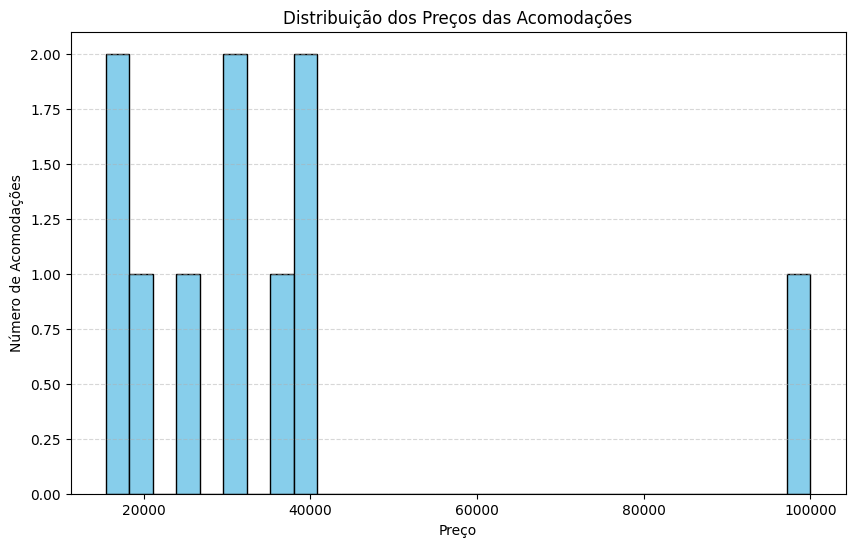

In [66]:
import matplotlib.pyplot as plt

# Gera um histograma dos preços
plt.figure(figsize=(10, 6))
plt.hist(resultado['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Preços das Acomodações')
plt.xlabel('Preço')
plt.ylabel('Número de Acomodações')
plt.grid(axis='y', linestyle='--', alpha=0.5)

In [67]:
resultado = duckdb.sql("""
    SELECT DISTINCT 
        listings.id,
        listings.name, 
        listings.price, 
        listings.beds, 
        listings.bathrooms, 
        reviews.comments  -- Adiciona a coluna 'comments' da tabela 'reviews'
    FROM listings 
    JOIN calendario ON listings.id = calendario.listing_id  -- Junção com a tabela 'calendario'
    JOIN reviews ON listings.id = reviews.listing_id  -- Junção com a tabela 'reviews' usando a chave 'listing_id'
    WHERE listings.price > 0  -- Filtra valores de price que são maiores que 0
      AND listings.beds > 6  -- Filtra apenas registros com mais de 6 camas
      AND listings.bathrooms > 2  -- Filtra apenas registros com mais de 2 banheiros
      AND calendario.available = TRUE  -- Filtra apenas as acomodações disponíveis para aluguel
    ORDER BY listings.price ASC 
    LIMIT 20
""").to_df()
resultado


,id,name,price,beds,bathrooms,comments
0,47814931,Cama Dorm Misto de 9 com Ar no Melhor de Ipanema,50.0,9,5,"O lugar é bem aconchegante, os ambientes são l..."
1,47814931,Cama Dorm Misto de 9 com Ar no Melhor de Ipanema,50.0,9,5,"Muy bueno, se conoce a mucha gente y el person..."
2,47814931,Cama Dorm Misto de 9 com Ar no Melhor de Ipanema,50.0,9,5,No responde pronto
3,17999548,✿ Comfy Hostel near all the Touristic Spots in...,50.0,10,4,"Muito boa minha experiência com o Hostel, func..."
4,17999548,✿ Comfy Hostel near all the Touristic Spots in...,50.0,10,4,"Melhor Hostel do Rio de Janeiro, funcionários ..."
5,17999548,✿ Comfy Hostel near all the Touristic Spots in...,50.0,10,4,Voltarei e indico com certeza!
6,17999548,✿ Comfy Hostel near all the Touristic Spots in...,50.0,10,4,Very nice place where you meet all kinds of co...
7,18079348,$ Cheap Hostel ✌ Superb Services ⦿ Best Location,50.0,8,4,"O melhor lugar que achei no Rio, bem localizad..."
8,18079348,$ Cheap Hostel ✌ Superb Services ⦿ Best Location,50.0,8,4,O lugar foi incrivel ! Com certeza indico para...
9,47814931,Cama Dorm Misto de 9 com Ar no Melhor de Ipanema,50.0,9,5,"Tudo impecável, próximo de tudo!!!"


In [68]:
specific_id = 17999548  # Substitua pelo ID específico desejado

resultado = duckdb.sql(f"""
    SELECT DISTINCT 
        listings.name, 
        listings.price, 
        listings.beds, 
        listings.bathrooms, 
        reviews.comments  -- Adiciona a coluna 'comments' da tabela 'reviews'
    FROM listings 
    JOIN calendario ON listings.id = calendario.listing_id  -- Junção com a tabela 'calendario'
    JOIN reviews ON listings.id = reviews.listing_id  -- Junção com a tabela 'reviews'
    WHERE listings.id = {specific_id}  -- Filtra pelo ID específico
      AND listings.price > 0  -- Filtra valores de price que são maiores que 0
      AND listings.beds > 6  -- Filtra apenas registros com mais de 6 camas
      AND listings.bathrooms > 2  -- Filtra apenas registros com mais de 2 banheiros
      AND calendario.available = TRUE  -- Filtra apenas as acomodações disponíveis para aluguel
    ORDER BY listings.price DESC 
    LIMIT 100
""").to_df()
resultado

,name,price,beds,bathrooms,comments
0,✿ Comfy Hostel near all the Touristic Spots in...,50.0,10,4,Ótimo espaço!
1,✿ Comfy Hostel near all the Touristic Spots in...,50.0,10,4,"Mi primera vez en Río de Janeiro, y se que cua..."
2,✿ Comfy Hostel near all the Touristic Spots in...,50.0,10,4,"Una linda vista al cristo redentor, buen desay..."
3,✿ Comfy Hostel near all the Touristic Spots in...,50.0,10,4,Top
4,✿ Comfy Hostel near all the Touristic Spots in...,50.0,10,4,"Acomodação super alto astral, com uma vibe boa..."
5,✿ Comfy Hostel near all the Touristic Spots in...,50.0,10,4,"Great, central location, outstanding value and..."
6,✿ Comfy Hostel near all the Touristic Spots in...,50.0,10,4,"Fiquei uns poucos días aqui. Porém, minha esta..."
7,✿ Comfy Hostel near all the Touristic Spots in...,50.0,10,4,"Um ótimo hostel, em uma ótima localidade, vale..."
8,✿ Comfy Hostel near all the Touristic Spots in...,50.0,10,4,O hostel fica em uma ótima localização e a hos...
9,✿ Comfy Hostel near all the Touristic Spots in...,50.0,10,4,"O hostel tem excelente localização, bem colori..."


In [69]:
# AVALIAÇÕES DOS ALUGUÉIS DOS ANUNCIOS
resultado_avaliacao = duckdb.sql("""
    SELECT listings.name, reviews.comments
    FROM reviews
    JOIN listings ON reviews.listing_id = listings.id
    LIMIT 100
""").to_df()
resultado_avaliacao

,name,comments
0,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",This apartment is in a perfect location -- two...
1,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",we had a really great experience staying in Ma...
2,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Staying in Max appartment is like living in a ...
3,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",In general very good and reasonable price.\r<b...
4,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",The apt was nice and in a great location only ...
5,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",At Copacabana apartment is best the situation ...
6,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",A great apartment in a great location. The clo...
7,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Apartment is exactly as Max advertised. If we ...
8,"Very Nice 2Br in Copacabana w. balcony, fast WiFi","Great apartment, amazing price and location in..."
9,Suíte Casal (banheiro privativo),Staying at Taciana's was a GREAT experience! S...


In [70]:
mais_caro = duckdb.sql("""
    SELECT id, name, price
    FROM listings
    ORDER BY price DESC
    LIMIT 10
""").to_df()

mais_caro

,id,name,price
0,13879989,Temporary rentals for Brazilian Cup.,633125.0
1,30033272,Apartamento em Rio de Janeiro,500000.0
2,695828287387937123,Pede Desconto Copacabana Top Piso em Mármore,500000.0
3,1020594041193205143,Quarto em Apartamento vila do chaves,160888.0
4,612413603184031875,Vista Lateral Mar +4 Varandinhas +Melhor Endereço,100000.0
5,685718700490335415,"Pertíssimo Barra: Imenso, Claro, Amplo!",100000.0
6,700229188583061802,Quarto Melhor Localizado em Copacabana Simples,100000.0
7,612328960110087884,Varandas Mar Copacabana + Seguro +Claro +Amplo,99000.0
8,8596751,Tudo Super Bacana pra Voltar Sempre,79229.0
9,40721389,Quarto com 1 beliche no coração da Lapa,54000.0


In [71]:
# conversão em parquet para permitir performance (subir no git)
listings.to_parquet('listings.parquet')
reviews.to_parquet('reviews.parquet')
calendario.to_parquet('calendario.parquet')